In [1]:
import numpy as np #np.dot(x, y) xyの内積をとる関数。
import matplotlib.pyplot as plt

In [2]:
from scipy.optimize import curve_fit
import pandas as pd

In [3]:
from scipy.optimize import minimize

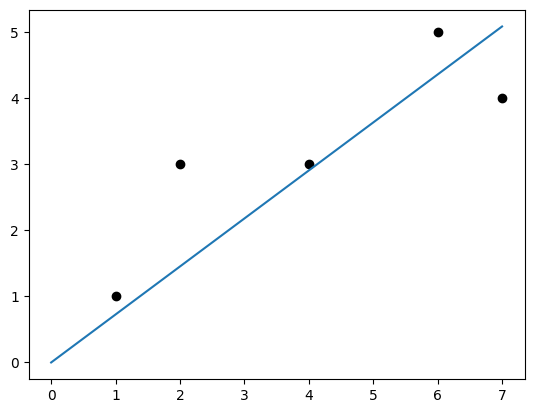

In [4]:
x = np.array([1,2,4,6,7]) # 内積計算のためにnp.arrayで作る。
y = np.array([1,3,3,5,4])

def reg1dim(x, y):
    a = np.dot(x, y)/ (x ** 2).sum()
    return a

a = reg1dim(x, y)

plt.scatter(x, y, color="k")
plt.plot([0,x.max()], [0, a * x.max()]) # x.max() 配列xの最大値まで 
plt.show()

In [5]:
# データの読み込み
dataset = pd.read_csv('xy.csv')
x = dataset['x']
y = dataset['y']

In [6]:
# モデル関数の定義
def model_k1(x, Kxx, Kyy, Kxy):
    C = np.cos(np.radians(x))
    S = np.sin(np.radians(x))
    k1 = C*(C*Kxx + S*Kxy) + S*(C*Kxy + S*Kyy)
    k2 = C*(-0.5*Kxx*(-0.5*C - 0.866025403784439*S) - 0.5*Kxy*(-0.866025403784439*C - 0.5*S) - 0.866025403784439*Kxy*(-0.5*C - 0.866025403784439*S) - 0.866025403784439*Kyy*(-0.866025403784439*C - 0.5*S)) + S*(-0.866025403784439*Kxx*(-0.5*C - 0.866025403784439*S) - 0.866025403784439*Kxy*(-0.866025403784439*C - 0.5*S) - 0.5*Kxy*(-0.5*C - 0.866025403784439*S) - 0.5*Kyy*(-0.866025403784439*C - 0.5*S))
    k3 = C*(-0.5*Kxx*(-0.5*C + 0.866025403784439*S) + 0.866025403784439*Kxy*(-0.5*C + 0.866025403784439*S) - 0.5*Kxy*(0.866025403784439*C - 0.5*S) + 0.866025403784439*Kyy*(0.866025403784439*C - 0.5*S)) + S*(0.866025403784439*Kxx*(-0.5*C + 0.866025403784439*S) - 0.5*Kxy*(-0.5*C + 0.866025403784439*S) + 0.866025403784439*Kxy*(0.866025403784439*C - 0.5*S) - 0.5*Kyy*(0.866025403784439*C - 0.5*S))
    return k1,k2,k3

# def model_k2(x, Kxx, Kyy, Kxy):
#     C = np.cos(np.radians(x))
#     S = np.sin(np.radians(x))
#     k2 = C*(-0.5*Kxx*(-0.5*C - 0.866025403784439*S) - 0.5*Kxy*(-0.866025403784439*C - 0.5*S) - 0.866025403784439*Kxy*(-0.5*C - 0.866025403784439*S) - 0.866025403784439*Kyy*(-0.866025403784439*C - 0.5*S)) + S*(-0.866025403784439*Kxx*(-0.5*C - 0.866025403784439*S) - 0.866025403784439*Kxy*(-0.866025403784439*C - 0.5*S) - 0.5*Kxy*(-0.5*C - 0.866025403784439*S) - 0.5*Kyy*(-0.866025403784439*C - 0.5*S))
#     return k2

# def model_k3(x, Kxx, Kyy, Kxy):
#     C = np.cos(np.radians(x))
#     S = np.sin(np.radians(x))
#     k3 = C*(-0.5*Kxx*(-0.5*C + 0.866025403784439*S) + 0.866025403784439*Kxy*(-0.5*C + 0.866025403784439*S) - 0.5*Kxy*(0.866025403784439*C - 0.5*S) + 0.866025403784439*Kyy*(0.866025403784439*C - 0.5*S)) + S*(0.866025403784439*Kxx*(-0.5*C + 0.866025403784439*S) - 0.5*Kxy*(-0.5*C + 0.866025403784439*S) + 0.866025403784439*Kxy*(0.866025403784439*C - 0.5*S) - 0.5*Kyy*(0.866025403784439*C - 0.5*S))
#     return k3

# 初期推定値
initial_guess = [1, 1, 1]

# 各モデルに対してフィッティングを実行
popt1, pcov1 = curve_fit(model_k1, x, y, p0=initial_guess)
# popt2, pcov2 = curve_fit(model_k2, x, y, p0=initial_guess)
# popt3, pcov3 = curve_fit(model_k3, x, y, p0=initial_guess)

# フィッティング結果のプロット
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data', color='blue')

# フィッティング曲線のプロット
x_fit = np.linspace(min(x), max(x), 1000)
plt.plot(x_fit, model_k1(x_fit, *popt1), label='Fit 1', color='red')
# plt.plot(x_fit, model_k2(x_fit, *popt2), label='Fit 2', color='green')
# plt.plot(x_fit, model_k3(x_fit, *popt3), label='Fit 3', color='orange')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Fitting Multiple Models to Data')
plt.show()

# フィッティング結果の表示
print(f'Fit parameters for model 1: {popt1}')
# print(f'Fit parameters for model 2: {popt2}')
# print(f'Fit parameters for model 3: {popt3}')

ValueError: object too deep for desired array

error: Result from function call is not a proper array of floats.

In [ ]:
# モデル関数
def model(x, Kxx, Kyy, Kxy):
    C = np.cos(np.radians(x))
    S = np.sin(np.radians(x))
    k1 = C*(C*Kxx + S*Kxy) + S*(C*Kxy + S*Kyy)
    k2 = C*(-0.5*Kxx*(-0.5*C - 0.866025403784439*S) - 0.5*Kxy*(-0.866025403784439*C - 0.5*S) - 0.866025403784439*Kxy*(-0.5*C - 0.866025403784439*S) - 0.866025403784439*Kyy*(-0.866025403784439*C - 0.5*S)) + S*(-0.866025403784439*Kxx*(-0.5*C - 0.866025403784439*S) - 0.866025403784439*Kxy*(-0.866025403784439*C - 0.5*S) - 0.5*Kxy*(-0.5*C - 0.866025403784439*S) - 0.5*Kyy*(-0.866025403784439*C - 0.5*S))
    k3 = C*(-0.5*Kxx*(-0.5*C + 0.866025403784439*S) + 0.866025403784439*Kxy*(-0.5*C + 0.866025403784439*S) - 0.5*Kxy*(0.866025403784439*C - 0.5*S) + 0.866025403784439*Kyy*(0.866025403784439*C - 0.5*S)) + S*(0.866025403784439*Kxx*(-0.5*C + 0.866025403784439*S) - 0.5*Kxy*(-0.5*C + 0.866025403784439*S) + 0.866025403784439*Kxy*(0.866025403784439*C - 0.5*S) - 0.5*Kyy*(0.866025403784439*C - 0.5*S))
    return np.array([k1, k2, k3]).flatten()

# 目的関数
def objective(x, Kxx, Kyy, Kxy):
    k1, k2, k3 = model(x, Kxx, Kyy, Kxy)
    return np.concatenate((k1, k2, k3))

# フィッティング
params, params_covariance = curve_fit(objective, x, y, p0=[1, 1, 1])

print("Fitted parameters: Kxx =", params[0], "Kyy =", params[1], "Kxy =", params[2])

ValueError: too many values to unpack (expected 3)

In [ ]:
# モデル関数の定義
def model(x, Kxx, Kyy, Kxy):
    C = np.cos(np.radians(x))
    S = np.sin(np.radians(x))
    k1 = C*(C*Kxx + S*Kxy) + S*(C*Kxy + S*Kyy)
    k2 = C*(-0.5*Kxx*(-0.5*C - 0.866025403784439*S) - 0.5*Kxy*(-0.866025403784439*C - 0.5*S) - 0.866025403784439*Kxy*(-0.5*C - 0.866025403784439*S) - 0.866025403784439*Kyy*(-0.866025403784439*C - 0.5*S)) + S*(-0.866025403784439*Kxx*(-0.5*C - 0.866025403784439*S) - 0.866025403784439*Kxy*(-0.866025403784439*C - 0.5*S) - 0.5*Kxy*(-0.5*C - 0.866025403784439*S) - 0.5*Kyy*(-0.866025403784439*C - 0.5*S))
    k3 = C*(-0.5*Kxx*(-0.5*C + 0.866025403784439*S) + 0.866025403784439*Kxy*(-0.5*C + 0.866025403784439*S) - 0.5*Kxy*(0.866025403784439*C - 0.5*S) + 0.866025403784439*Kyy*(0.866025403784439*C - 0.5*S)) + S*(0.866025403784439*Kxx*(-0.5*C + 0.866025403784439*S) - 0.5*Kxy*(-0.5*C + 0.866025403784439*S) + 0.866025403784439*Kxy*(0.866025403784439*C - 0.5*S) - 0.5*Kyy*(0.866025403784439*C - 0.5*S))
    return k1, k2, k3

# 誤差関数の定義
def error_function(params, x, y):
    Kxx, Kyy, Kxy = params
    residuals = []
    for j in range(3):
        for i in range(len(y)-1):
            y_pred = model(x[i], Kxx, Kyy, Kxy)
            residuals.append((y[i][j] - y_pred[j])**2)
            residuals.append((y[i][j])**2)
    return np.sum(residuals)

y_pred = model(x[1], 1, 1, 1)
print(y_pred)
print(y_pred[1])
print(y)

# 初期パラメータの推定
initial_params = [1.0, 1.0, 1.0]

# 最適化
result = minimize(error_function, initial_params, args=(x, y))

# 最適化結果の表示
Kxx_opt, Kyy_opt, Kxy_opt = result.x
print(f'Optimal parameters:\nKxx = {Kxx_opt}\nKyy = {Kyy_opt}\nKxy = {Kxy_opt}')

(1.0174585695203529, 1.898603538023155, 0.1363136010175522)
1.898603538023155
0     -1.353185
1     -8.408062
2     -1.029240
3     -8.442742
4     -0.818826
         ...   
115    1.181701
116   -6.279406
117   -5.956598
118    1.150596
119    1.178090
Name: y, Length: 120, dtype: float64


IndexError: invalid index to scalar variable.